In [9]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:

# Load dataset
df = pd.read_csv("air_quality_data.csv")  # Ensure you have an air quality dataset

# Display first few rows
print(df.head())

        PM2.5        PM10        NO2        CO          O3        SO2  \
0   62.435617  145.669109  22.587628  2.643501   38.787625  66.546476   
1  143.100003  116.497346  56.480590  2.447991   37.167668  61.633168   
2  112.479152   75.714971  87.929854  0.225646  109.688004  46.735258   
3   93.812188  166.483104  74.561364  1.772114   37.450082  76.571677   
4   31.842610  143.251611  81.623309  1.962959   39.914470  17.637012   

   Temperature   Humidity         AQI  
0    30.181090  40.056368   78.843948  
1    33.900442  76.184822  105.225297  
2    17.514037  89.806653   84.545947  
3    28.746223  22.101820  102.399145  
4    27.152379  82.815611   68.715391  


In [11]:
# Check for missing values
df.fillna(df.mean(), inplace=True)

# Selecting relevant features
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'Temperature', 'Humidity']
target = 'AQI'

In [12]:
# Splitting dataset into training and testing
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predicting on test data
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 3.241530090795091
Mean Squared Error: 17.57571046943776
R-squared Score: 0.9644344578712126


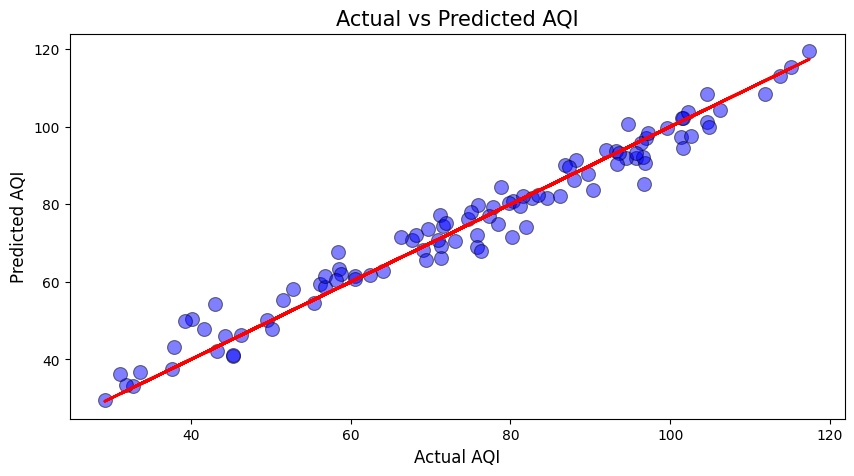

In [7]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, s=100, color='blue', edgecolor='black')
plt.plot(y_test, y_test, color='red', lw=2)
plt.xlabel("Actual AQI", fontsize=12)
plt.ylabel("Predicted AQI", fontsize=12)
plt.title("Actual vs Predicted AQI", fontsize=15)
plt.show()
